In [325]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import time

In [428]:
ocean_df = pd.read_csv("ocean.csv")[["latitude", "WavePeriod"]].dropna()[1:].astype(float)
north_df = ocean_df[ocean_df["latitude"] >= 45]


C:\Users\evtol\AppData\Local\Temp\ipykernel_31096\1296956707.py:1: DtypeWarning: Columns (1,2,4,5,6,7,8,9,10,11,12,13,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  ocean_df = pd.read_csv("ocean.csv")[["latitude", "WavePeriod"]].dropna()[1:].astype(float)


(array([1.72060e+04, 1.90349e+05, 1.28952e+05, 1.49826e+05, 3.52090e+04,
        1.71960e+04, 1.65200e+03, 1.11000e+02, 3.60000e+01, 8.00000e+00]),
 array([ 2. ,  3.6,  5.2,  6.8,  8.4, 10. , 11.6, 13.2, 14.8, 16.4, 18. ]),
 <BarContainer object of 10 artists>)

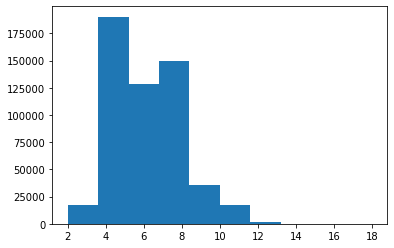

In [429]:
waves = north_df.iloc[:,1].tolist()

plt.hist(waves)

In [430]:
def rand_period():
    pick = random.choice(waves)
    return pick

def rand_wave():
    pick = rand_period()
    wavelength = (9.8 * pick)/(2*3.14)
    return (wavelength, pick)

# result is wavelength, time period

wavelength, time_period = rand_wave()        


In [431]:
fsd = {}

fsd[24000.0] = 1                          # ice width in meters
total_time = 0
break_num = 0

for i in range(3600):
    if total_time >= 86400:                 # stops after one day has passed
        break
    sizes = list(fsd.keys())               # get a list of all the available sizes 
    location = float(random.choice(sizes))   # choose a random spot were the ice will split
    wavelength, time_period = rand_wave()         # get a random wavelength
    total_time += time_period
    if fsd[location] == 0:
        continue
    elif location/wavelength > 1:            # see if the ice will break
        break_num += 1
        new_ice = location/2              # make a variable for the new ice dimensions  
        fsd[location] += -1
        if new_ice in fsd:                 # check and see if this new ice is in the dict
            fsd[new_ice] += 4              # add four to the count (bc ice divides into four pices)
                       # remove one from the old size since it broke
        else:                              
            fsd[new_ice] = 4               # if not in dict, add to dict

bps = (break_num/86400)  # breaks per second
bpm = bps* 60   # breaks per minute



Text(0, 0.5, 'Count')

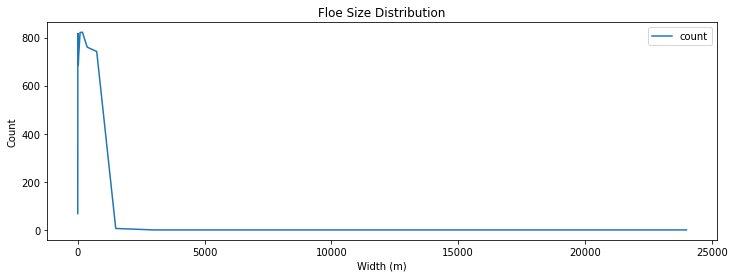

In [427]:
sizes = list(fsd.keys()) 
counts = list(fsd.values())

d = {'sizes': sizes, 'count': counts}
ice = pd.DataFrame(data=d)


ax = ice.plot.line(x="sizes", y="count", figsize=(12, 4))
ax.set_title("Floe Size Distribution")
ax.set_xlabel("Width (m)")
ax.set_ylabel("Count")